In [1]:
## Summer Winds

In [44]:
import cmocean.cm as cm
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

%matplotlib inline

In [40]:
def parse(year, month, day, hour):
    mydate = dt.datetime(year, month, day, hour)
    return mydate

In [33]:
pd.read_csv('/ocean/sallen/allen/research/sog/SOG_10/SOG-forcing/wind/SH_total_31Dec2020.dat', header=None, sep='\s+')

,0,1,2,3,4,5
0,1,5,1967,1.0,-2.867900,4.095800
1,1,5,1967,2.0,-2.867900,4.095800
2,1,5,1967,3.0,-2.236900,3.194700
3,1,5,1967,4.0,-4.250100,1.138800
4,1,5,1967,5.0,-3.767100,1.009400
...,...,...,...,...,...,...
441354,28,3,2019,19.0,-0.242099,-2.767207
441355,28,3,2019,20.0,2.265769,-1.056546
441356,28,3,2019,21.0,1.222201,-4.561316
441357,28,3,2019,22.0,0.217889,-2.490487


In [63]:
wind = pd.read_csv('/ocean/sallen/allen/research/sog/SOG_10/SOG-forcing/wind/SH_total_31Dec2020.dat', 
                   header=None, names=['Day', 'Month', 'Year', 'Hour','AlongWind', 'AcrossWind'], sep='\s+')

In [64]:
wind['datetime'] = pd.to_datetime(wind[['Year', 'Month', 'Day', 'Hour']])
wind = wind.set_index('datetime')

In [66]:
wind['speed'] = wind['AlongWind']**2 + wind['AcrossWind']**2

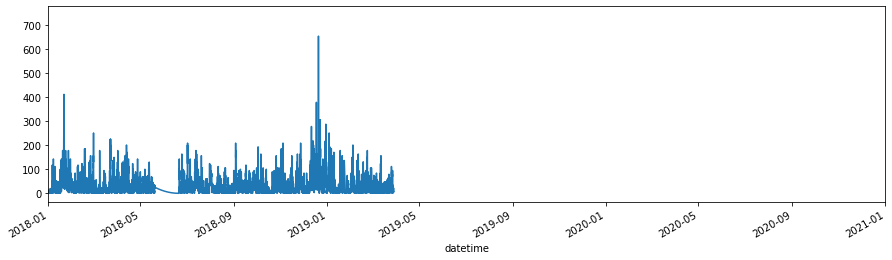

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
wind.speed.plot(ax=ax);
ax.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2021, 1, 1));

In [3]:
jun2020 = xr.open_dataset('/data/sallen/results/MEOPAR/ops_y2020m06.nc')

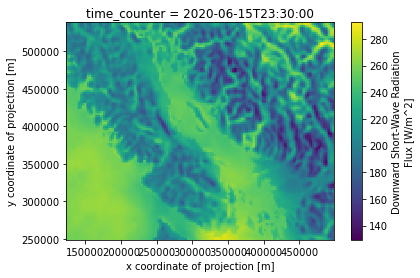

In [22]:
jun2020.solar[0, 100:216, 50:200].plot();

In [23]:
jun2019 = xr.open_dataset('/data/sallen/results/MEOPAR/ops_y2019m06.nc')

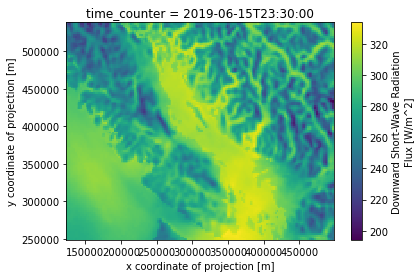

In [24]:
jun2019.solar[0, 100:216, 50:200].plot();

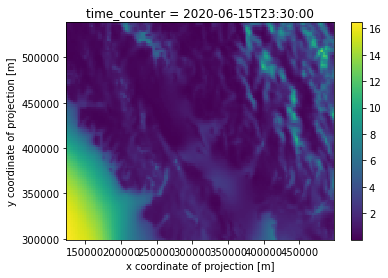

In [30]:
(jun2020.u_wind**2 + jun2020.v_wind**2)[0, 120:216, 50:200].plot()

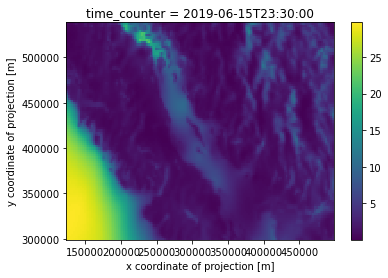

In [31]:
(jun2019.u_wind**2 + jun2019.v_wind**2)[0, 120:216, 50:200].plot()

In [32]:
jun_mean = xr.open_dataset('/data/sallen/results/MEOPAR/ops_climate_m06.nc')

In [37]:
(100*(jun2020.solar[0] - jun_mean.solar[0])/jun_mean.solar[0]).plot();

ValueError: x must be one of None, 'time_counter', 'x', 'y'

<ipython-input-47-7a85e3df2413>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = plt.pcolormesh(jun2020.nav_lon, jun2020.nav_lat, 100*(jun2020.solar[0] - jun_mean.solar[0])


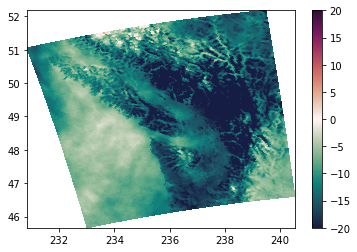

In [47]:
colours = plt.pcolormesh(jun2020.nav_lon, jun2020.nav_lat, 100*(jun2020.solar[0] - jun_mean.solar[0])
                         /jun_mean.solar[0], cmap=cm.curl, vmax=20, vmin=-20)
plt.colorbar();

In [ ]:
1+2
